# Aula prática 1


*   Tratamento de dados do arquivo "tempo.csv"


In [ ]:
#Importação das bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [ ]:
dataset.shape

(14, 5)

## Exploração por categorias

In [ ]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

* tratar os nan de umidade e vento 






In [ ]:
aparencia_agrupado = dataset.groupby(['Aparencia']).size()
aparencia_agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

* Tratar o dado "menos"

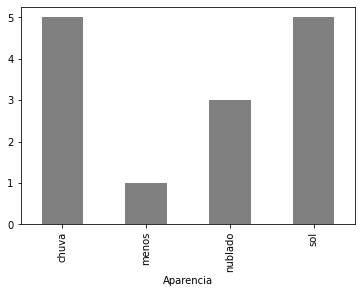

In [ ]:
aparencia_agrupado.plot.bar(color = "gray")

In [ ]:
temperatura_agrupado = dataset.groupby(dataset["Temperatura"]).size()
temperatura_agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

* Tratar o dado discrepante 1220

In [ ]:
umidade_agrupado = dataset.groupby(dataset["Umidade"]).size()
umidade_agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [ ]:
vento_agrupado = dataset.groupby(dataset["Vento"]).size()
vento_agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
jogar_agrupado = dataset.groupby(dataset["Jogar"]).size()
jogar_agrupado

Jogar
nao    5
sim    9
dtype: int64

# Tratamento dos dados

## Tratamento da aparencia


In [ ]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

In [ ]:
aparencia_agrupado= dataset.groupby(dataset["Aparencia"]).size()
aparencia_agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

# Tratamento Temperatura

In [ ]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
temperatura_mediana = sts.median(dataset["Temperatura"])
temperatura_mediana

73.5

In [ ]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), "Temperatura"] = temperatura_mediana
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


## Tratamento Umidade

In [ ]:
umidade_agrupado = dataset.groupby(['Umidade']).size()
umidade_agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [ ]:
mediana_umidade = sts.median(dataset["Umidade"])
mediana_umidade

85.5

In [ ]:
dataset.Umidade.fillna(mediana_umidade, inplace = True)

In [ ]:
dataset.Umidade.isnull().sum()

0

In [ ]:
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100), "Umidade"] = mediana_umidade

## Tratamento dos ventos

In [ ]:
dataset.Vento.isnull().sum()

1

In [ ]:
vento_agrupado = dataset.groupby(["Vento"]).size()
vento_agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
dataset.Vento.fillna("FALSO", inplace = True)
dataset.Vento.isnull().sum()

0

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
